<a href="https://colab.research.google.com/github/juliosaopedro/juliosaopedro/blob/main/1_RedAsset_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema

Uma empresa atacadista (Cedente) possui 1 cheque (Título) no valor de 10.000 de um mercado que é seu cliente (Sacado) com vencimento para daqui a 1 mês, mas o cedente necessita de dinheiro hoje para pagar uma dívida. O Cedente procura a RED para adiantar um cheque, a taxa cobrada é de 5% a.m (juros compostos), ou seja, o Cedente vai receber hoje 95% do valor do cheque (9.500) , os 500 são chamados de valor de deságio e a RED vai receber os de 10.000 no final no vencimento do título.

##Dados :
BASE_TITULOS.txt

##Layout do arquivo :
### Descrição das Colunas 
- `CODIGO` <br>
Tipo Numérica <br>
Código do título ` <br>

- `NOME_FUNDO` <br> Nome do fundo em que o título está registrado <br>

- `TIPO_PRODUTO` <br> Tipo de produto do título ` <br>

- `CEDENTE` <br> Nome do Cedente <br>

- `SACADO` <br> Nome do sacado <br>

- `LIMITE_CEDENTE` <br>  Limite de Crédito do Cedente <br>

- `ESTADO_CEDENTE` <br>  Estado de cadastro do Cedente <br>

- `ESTADO_SACADO` <br>  Estado de cadastro do sacado <br>

- `VENCIMENTO` <br>  Data de vencimento do título <br>

- `DATA_EMISSAO` <br>  Data de emissão do título <br>

- `DATA_PAGAMENTO` <br>  Data de vencimento de pagamento do título

- `VALOR_REAL` <br>  Valor do título <br>

- `VALOR_DESAGIO` <br>  valor de deságio do título <br>

- `TAXA_MENSAL` <br>  Taxa mensal (30 dias) que foi utilizada para o desconto do título <br>

- `STATUS_LIQ_TITULO` <br>  Status de liquidação do título (EM_DIA: O Título foi pago em dia, ATRASO o título foi pago em atraso) <br>


- `RISCO_1` até `RISCO_21` <br>  Variáveis que indicam risco <br>

## <b> ATIVIDADES : </b>
<b> 1  -  Análise descritiva dos ativos </b>
<li> Regionalização
<li> Concentraçaõ de clientes
<li> Taxas de Pagamentos
<li> Receitas
<li> Entre outros ...

In [ ]:
# Importar os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline


In [ ]:
# Graficos
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
# Configurando nosso ambiente
# Formatando nossa saida 
pd.set_option('float_format', '{:f}'.format)

In [ ]:
# Importar o arquivo de dados
df = pd.read_csv('/content/BASE_TITULOS.txt',sep='\t')

# Verificando as primeiras linhas
df.head(5)

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,DATA_PAGAMENTO,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2018-03-18,2017-10-28,2018-03-18,1190.990000,166.384869,0.028214,0.028472,1.000000,0.000000,nan,0.000000,nan,0.000000,0.610895,0.000000,nan,0.000000,nan,0.168124,0,0.066667,0.200000,0.727965,0.738669,0.407407,0.860111,0.985155,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-06-24,2018-05-21,2018-06-21,29209.380000,571.781205,0.017253,0.192935,0.500000,0.958204,0.014139,0.013354,0.246686,0.000000,0.380525,0.020198,0.015453,0.666667,0.161228,0.392065,0,0.266667,0.600000,0.010041,0.012547,0.395062,0.698438,0.707374,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2018-03-19,2017-11-29,2018-03-21,756.660000,63.951581,0.022375,0.033609,1.000000,0.000000,nan,0.000000,nan,0.000000,0.581379,0.000000,nan,0.000000,nan,0.109617,0,0.066667,0.200000,0.327489,0.321123,0.395062,0.890059,0.987560,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-04-03,2018-02-14,2018-04-06,7869.880000,190.764728,0.015082,0.183401,0.500000,0.124609,0.007712,0.000024,0.684831,0.000000,0.179036,0.020187,0.128587,0.666667,0.099808,0.415602,0,0.400000,0.600000,0.012217,0.017485,0.419753,0.609827,0.906279,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2018-02-02,2017-11-03,2018-02-02,1064.920000,105.976693,0.031770,0.028472,1.000000,0.000000,nan,0.000000,nan,0.000000,0.514459,0.000000,nan,0.000000,nan,0.168124,0,0.066667,0.200000,0.727965,0.738669,0.407407,0.860111,0.368493,EM_DIA


In [ ]:
# Dimensões do df
print("Dimensões do DataFrame:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Dimensões do DataFrame:
Linhas:		9415
Colunas:	36


In [ ]:
# tipo das variáveis
print("\nTipos das Variáveis:")
print(df.dtypes)


Tipos das Variáveis:
CODIGO                 int64
NOME_FUNDO            object
TIPO_PRODUTO          object
CEDENTE               object
SACADO                object
LIMITE_CEDENTE         int64
ESTADO_CEDENTE        object
ESTADO_SACADO         object
VENCIMENTO            object
DATA_EMISSAO          object
DATA_PAGAMENTO        object
VALOR_REAL           float64
VALOR_DESAGIO        float64
TAXA_MENSAL          float64
RISCO_1              float64
RISCO_2              float64
RISCO_3              float64
RISCO_4              float64
RISCO_5              float64
RISCO_6              float64
RISCO_7              float64
RISCO_8              float64
RISCO_9              float64
RISCO_10             float64
RISCO_11             float64
RISCO_12             float64
RISCO_13             float64
RISCO_14               int64
RISCO_15             float64
RISCO_16             float64
RISCO_17             float64
RISCO_18             float64
RISCO_19             float64
RISCO_20             

In [ ]:
# Verificando valores nulos
df.isnull().sum()


CODIGO                  0
NOME_FUNDO              0
TIPO_PRODUTO            0
CEDENTE                 0
SACADO                  0
LIMITE_CEDENTE          0
ESTADO_CEDENTE          0
ESTADO_SACADO         242
VENCIMENTO              0
DATA_EMISSAO            0
DATA_PAGAMENTO          0
VALOR_REAL              0
VALOR_DESAGIO           0
TAXA_MENSAL             2
RISCO_1                 0
RISCO_2                 0
RISCO_3                 0
RISCO_4              6847
RISCO_5                 0
RISCO_6              7754
RISCO_7                 0
RISCO_8                 0
RISCO_9                 0
RISCO_10             4485
RISCO_11                0
RISCO_12             7764
RISCO_13               40
RISCO_14                0
RISCO_15                0
RISCO_16                0
RISCO_17                0
RISCO_18                0
RISCO_19              137
RISCO_20                0
RISCO_21                0
STATUS_LIQ_TITULO       0
dtype: int64

In [ ]:
#Localizando registros com TAXA_MENSAL nula
np.where(pd.isnull(df['TAXA_MENSAL']))


(array([1491, 2427]),)

In [ ]:
# Excluindo registros com TAXA_MENSAL nula
df.drop([1491,1491], inplace=True)
df.drop([2427,2427], inplace=True)

In [ ]:
# Para ESTADO_SACADO nulo vamos substituir por ESTADO_CEDENTE
df['ESTADO_SACADO'].fillna(df['ESTADO_CEDENTE'], inplace=True)

In [ ]:
# Verificando a quantidade de linhas e colunas

print('Linhas : ', df.shape[0])
print('Colunas :', df.shape[1])

Linhas :  9413
Colunas : 36


In [ ]:
# Analisando estatísticamente nossos dados
df.describe()

,CODIGO,LIMITE_CEDENTE,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21
count,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,2566.000000,9413.000000,1660.000000,9413.000000,9413.000000,9413.000000,4928.000000,9413.000000,1649.000000,9373.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9276.000000,9413.000000,9413.000000
mean,4708.583873,5753486.792521,6434.166490,485.786063,0.046295,0.368564,0.591697,0.095632,0.164909,0.002229,0.280800,0.000891,0.496366,0.004113,0.042545,0.088034,0.201561,0.414285,0.014236,0.197372,0.470328,0.122281,0.123076,0.388307,0.826680,0.678616
std,2718.005696,3259715.859710,41932.167705,3364.188149,0.050580,0.358991,0.366350,0.261086,0.256632,0.024840,0.279905,0.020661,0.286867,0.014578,0.075204,0.211116,0.232304,0.168227,0.118467,0.139441,0.236331,0.244616,0.244707,0.040895,0.222563,0.336308
min,1.000000,0.000000,17.240000,0.174568,-0.532319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2355.000000,2500000.000000,480.980000,31.905361,0.023639,0.065530,0.333333,0.000000,0.010283,0.000000,0.022091,0.000000,0.248502,0.000000,0.003311,0.000000,0.099808,0.332213,0.000000,0.133333,0.200000,0.003556,0.003205,0.382716,0.822073,0.417284
50%,4709.000000,6964286.000000,978.150000,77.306935,0.034636,0.213464,0.500000,0.000000,0.032134,0.000000,0.179676,0.000000,0.494327,0.000002,0.007726,0.000000,0.133717,0.474109,0.000000,0.200000,0.400000,0.018831,0.020265,0.382716,0.885640,0.830255
75%,7062.000000,8035714.000000,2867.980000,205.126808,0.054734,0.665771,1.000000,0.000062,0.201799,0.000000,0.662003,0.000000,0.740785,0.001247,0.043322,0.000000,0.186820,0.525219,0.000000,0.266667,0.600000,0.073831,0.076833,0.395062,0.976308,0.964654
max,9415.000000,10000000.000000,3112000.000000,163116.717700,2.320652,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999974,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Removendo OUTLIERS (Valores muito discrepantes)

In [ ]:
# Fazendo uma copia de nossos dados
df_clean = df.copy()

## Valor_Real

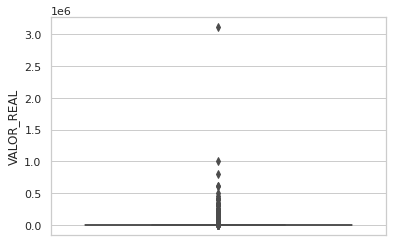

In [ ]:
# Grafico BOXPLOT
import seaborn as sns
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("df")
ax = sns.boxplot(y=df_clean["VALOR_REAL"],orient="Horizontal")

In [ ]:
df_clean.describe()

,CODIGO,LIMITE_CEDENTE,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL,RISCO_1,RISCO_2,RISCO_3,RISCO_4,RISCO_5,RISCO_6,RISCO_7,RISCO_8,RISCO_9,RISCO_10,RISCO_11,RISCO_12,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21
count,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,2566.000000,9413.000000,1660.000000,9413.000000,9413.000000,9413.000000,4928.000000,9413.000000,1649.000000,9373.000000,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000,9276.000000,9413.000000,9413.000000
mean,4708.583873,5753486.792521,6434.166490,485.786063,0.046295,0.368564,0.591697,0.095632,0.164909,0.002229,0.280800,0.000891,0.496366,0.004113,0.042545,0.088034,0.201561,0.414285,0.014236,0.197372,0.470328,0.122281,0.123076,0.388307,0.826680,0.678616
std,2718.005696,3259715.859710,41932.167705,3364.188149,0.050580,0.358991,0.366350,0.261086,0.256632,0.024840,0.279905,0.020661,0.286867,0.014578,0.075204,0.211116,0.232304,0.168227,0.118467,0.139441,0.236331,0.244616,0.244707,0.040895,0.222563,0.336308
min,1.000000,0.000000,17.240000,0.174568,-0.532319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2355.000000,2500000.000000,480.980000,31.905361,0.023639,0.065530,0.333333,0.000000,0.010283,0.000000,0.022091,0.000000,0.248502,0.000000,0.003311,0.000000,0.099808,0.332213,0.000000,0.133333,0.200000,0.003556,0.003205,0.382716,0.822073,0.417284
50%,4709.000000,6964286.000000,978.150000,77.306935,0.034636,0.213464,0.500000,0.000000,0.032134,0.000000,0.179676,0.000000,0.494327,0.000002,0.007726,0.000000,0.133717,0.474109,0.000000,0.200000,0.400000,0.018831,0.020265,0.382716,0.885640,0.830255
75%,7062.000000,8035714.000000,2867.980000,205.126808,0.054734,0.665771,1.000000,0.000062,0.201799,0.000000,0.662003,0.000000,0.740785,0.001247,0.043322,0.000000,0.186820,0.525219,0.000000,0.266667,0.600000,0.073831,0.076833,0.395062,0.976308,0.964654
max,9415.000000,10000000.000000,3112000.000000,163116.717700,2.320652,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999974,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Verificação da quantidade de VALOR_REAL acima de 20.000,00
print("Quantidade de contratos com VALOR_REAL acima de 20000.00:")
print("{} entradas".format(len(df_clean[df_clean.VALOR_REAL > 20000.00])))
print('\n')
print("Percentual em relação ao total de contratos")
print("{:.4f}%".format((len(df_clean[df_clean.VALOR_REAL > 20000.00]) / df_clean.shape[0])*100))

Quantidade de contratos com VALOR_REAL acima de 20000.00:
520 entradas


Percentual em relação ao total de contratos
5.5243%


In [ ]:
# Removendo OUTLIERS
df_clean.drop(df_clean[df_clean.VALOR_REAL > 20000.00].index, axis=0, inplace=True)

##Valor_Desagio

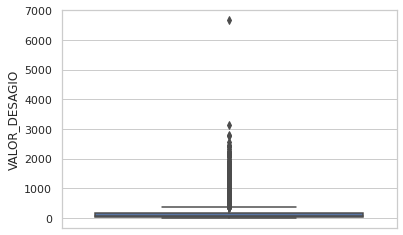

In [ ]:
# Grafico BOXPLOT
import seaborn as sns
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("df")
ax = sns.boxplot(y=df_clean["VALOR_DESAGIO"],orient="Horizontal")

In [ ]:
# Valor Desagio
print("Valor Desagio : valores acima de 3000.00:")
print("{} entradas".format(len(df_clean[df_clean.VALOR_DESAGIO > 3000])))
print("{:.4f}%".format((len(df_clean[df_clean.VALOR_DESAGIO > 3000]) / df_clean.shape[0])*100))

Valor Desagio : valores acima de 3000.00:
2 entradas
0.0225%


In [ ]:
# Removendo OUTLIERS
df_clean.drop(df_clean[df_clean.VALOR_DESAGIO > 3000].index, axis=0, inplace=True)

## Taxa_Mensal 



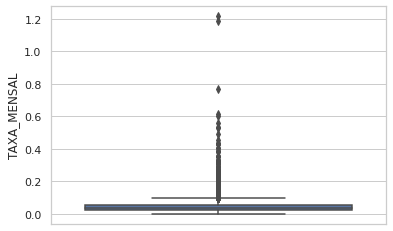

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("df")
ax = sns.boxplot(y=df_clean["TAXA_MENSAL"],orient="Horizontal")

In [ ]:
# Taxa Mensal
print("Taxa Mensal : valores acima de 0.6")
print("{} entradas".format(len(df[df.TAXA_MENSAL > 0.6])))
print("{:.4f}%".format((len(df[df.TAXA_MENSAL > 0.6]) / df.shape[0])*100))

Taxa Mensal : valores acima de 0.6
8 entradas
0.0850%


In [ ]:
# Removendo OUTLIERS
df_clean.drop(df_clean[df_clean.TAXA_MENSAL > 0.6].index, axis=0, inplace=True)

In [ ]:
# Taxa Mensal
print("Taxa Mensal : valores menores que 0")
print("{} entradas".format(len(df_clean[df_clean.TAXA_MENSAL < 0.00])))
print("{:.4f}%".format((len(df_clean[df_clean.TAXA_MENSAL < 0.00]) / df_clean.shape[0])*100))

Taxa Mensal : valores menores que 0
0 entradas
0.0000%


### Gravando no arquivo tratado 
- Sem `Outliers`
- Tratamento de dados nulos ou faltantes
- Nome do arquivo `BASE_TITULOS_CLEAN.txt`
- Será usado nos exercícios 2 e 3


In [ ]:
# Gravar arquivo já tratado para ser utilizado nas outras atividades
df_clean.to_csv('BASE_TITULOS_CLEAN.txt',index=False,sep='\t')

### Removendo as colunas de `Risco_XX`

In [ ]:
# Removendo as colunas RISCO_XX que não serão consideradas na análise descritiva
df_clean.drop(['RISCO_1','RISCO_2', 'RISCO_3', 'RISCO_4', 'RISCO_5', 'RISCO_6', 'RISCO_7', 'RISCO_8', 'RISCO_9','RISCO_10',
         'RISCO_11','RISCO_12','RISCO_13','RISCO_14','RISCO_15', 'RISCO_16','RISCO_17', 'RISCO_18', 'RISCO_19', 'RISCO_20', 'RISCO_21'], axis = 1, inplace = True) 

## Gráficos sem OUTLIERS

### Análise para o LIMITE_CEDENTE

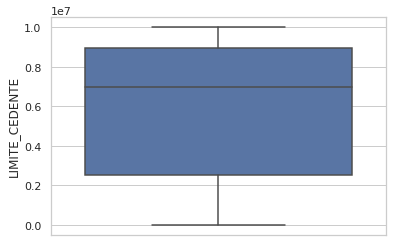

In [ ]:
# Gráfico do tipo BOXPLOT para LIMITE_CEDENTE 
import seaborn as sns
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("df")
ax = sns.boxplot(y=df_clean["LIMITE_CEDENTE"],orient="Horizontal")

In [ ]:
df_clean.describe()

,CODIGO,LIMITE_CEDENTE,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL
count,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000
mean,4755.856178,5789910.265924,2238.741645,160.054815,0.044690
std,2710.170567,3253582.396181,3377.094792,256.145442,0.037045
min,1.000000,0.000000,17.240000,0.174568,0.000032
25%,2426.250000,2500000.000000,462.840000,30.089320,0.023453
50%,4777.500000,6964286.000000,886.240000,70.036612,0.034338
75%,7092.500000,8928571.000000,2250.330000,170.257986,0.053826
max,9415.000000,10000000.000000,19968.010000,2805.329788,0.560505


#### Distribuição para LIMITE_CEDENTE </h3>
<li> Até 25% dos contratos o Limite_Cedente é : 2.500.000,00
<li> Até 50% dos contratos o Limite_Cedente é : 6.964.286,00
<li> Até 75% dos contratos o Limite_Cedente é : 8.035.714,00
<li> Maior valor do Limite_Cedente é : 10.000.000.00

### Análise para o VALOR_REAL

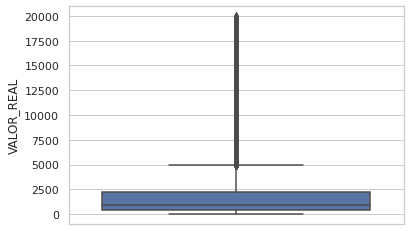

In [ ]:
# Grafico BOXPLOT
import seaborn as sns
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("df")
ax = sns.boxplot(y=df_clean["VALOR_REAL"],orient="Horizontal")

In [ ]:
df_clean.describe()

,CODIGO,LIMITE_CEDENTE,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL
count,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000
mean,4755.856178,5789910.265924,2238.741645,160.054815,0.044690
std,2710.170567,3253582.396181,3377.094792,256.145442,0.037045
min,1.000000,0.000000,17.240000,0.174568,0.000032
25%,2426.250000,2500000.000000,462.840000,30.089320,0.023453
50%,4777.500000,6964286.000000,886.240000,70.036612,0.034338
75%,7092.500000,8928571.000000,2250.330000,170.257986,0.053826
max,9415.000000,10000000.000000,19968.010000,2805.329788,0.560505


#### Distribuição para VALOR_REAL </h3>
<li> Até 25% dos contratos o Valor_Real é de : 462,84
<li> Até 50% dos contratos o Valor_Real é de : 886,24
<li> Até 75% dos contratos o Valor_Real é de : 2.250,33
<li> Maior valor do Valor_Real é : 19.968,01

### Análise para o VALOR_DESAGIO

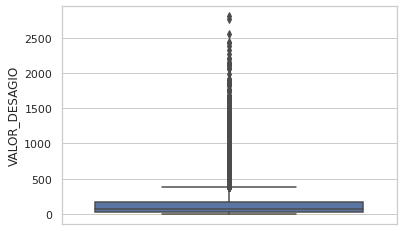

In [ ]:
# Gráfico do tipo BOXPLOT para VALOR_DESAGIO
ax = sns.boxplot(y=df_clean["VALOR_DESAGIO"],orient="Horizontal")

In [ ]:
df_clean.describe()

,CODIGO,LIMITE_CEDENTE,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL
count,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000
mean,4755.856178,5789910.265924,2238.741645,160.054815,0.044690
std,2710.170567,3253582.396181,3377.094792,256.145442,0.037045
min,1.000000,0.000000,17.240000,0.174568,0.000032
25%,2426.250000,2500000.000000,462.840000,30.089320,0.023453
50%,4777.500000,6964286.000000,886.240000,70.036612,0.034338
75%,7092.500000,8928571.000000,2250.330000,170.257986,0.053826
max,9415.000000,10000000.000000,19968.010000,2805.329788,0.560505


#### Distribuição para VALOR_DESAGIO </h3>
<li> Até 25% dos contratos o Valor_Desagio é de : 30,09
<li> Até 50% dos contratos o Valor_Desagio é de : 70,04
<li> Até 75% dos contratos o Valor_Desagio é de : 170,26
<li> Maior valor do Valor_Desagio é : 2.805,33

### Análise para TAXA_MENSAL

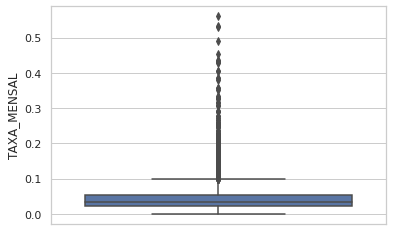

In [ ]:
ax = sns.boxplot(y=df_clean["TAXA_MENSAL"],orient="Horizontal")

In [ ]:
df_clean.describe()

,CODIGO,LIMITE_CEDENTE,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL
count,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000
mean,4755.856178,5789910.265924,2238.741645,160.054815,0.044690
std,2710.170567,3253582.396181,3377.094792,256.145442,0.037045
min,1.000000,0.000000,17.240000,0.174568,0.000032
25%,2426.250000,2500000.000000,462.840000,30.089320,0.023453
50%,4777.500000,6964286.000000,886.240000,70.036612,0.034338
75%,7092.500000,8928571.000000,2250.330000,170.257986,0.053826
max,9415.000000,10000000.000000,19968.010000,2805.329788,0.560505


#### Distribuição para TAXA_MENSAL </h3>
<li> Até 25% dos contratos a Taxa_Mensal é de : 0.023453
<li> Até 50% dos contratos a Taxa_Mensal é de : 0.034338
<li> Até 75% dos contratos a Taxa_Mensal é de : 0.053826
<li> Maior valor da Taxa_Mensal é : 0.560505

### Análise STATUS_LIQ_TITULO

In [ ]:
# Analisar a porcentagem de acordo com Status_Liq_Titulo
# Em dia e Atraso

print(round((df['STATUS_LIQ_TITULO'].value_counts() / df.shape[0] )*100,2));

EM_DIA   80.170000
ATRASO   19.830000
Name: STATUS_LIQ_TITULO, dtype: float64


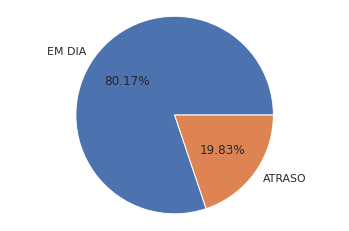

In [ ]:
# Grafico de Pizza
import matplotlib.pyplot as plt

labels = 'EM DIA', 'ATRASO'
sizes = [80.17, 19.83]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',)
ax1.axis('equal')
plt.show()

In [ ]:
# Incluir coluna para Status_Liq_Titulo com valores 0 e 1
# 0 Em dia 
# 1 Atraso
df['STATUS'] = df['STATUS_LIQ_TITULO'].map({'EM_DIA':0, 'ATRASO':1})


### Análise do percentual da quantidade de contratos por ESTADO_CEDENTE

In [ ]:
# Analisar a porcentagem de acordo com Estado do Cedente por qtd contrato
print(round((df['ESTADO_CEDENTE'].value_counts() / df.shape[0] )*100,2));

CE   35.110000
SP   30.850000
RS   11.950000
GO    6.470000
MG    6.020000
RJ    3.240000
PA    2.270000
SC    1.930000
BA    1.830000
MT    0.230000
SE    0.080000
Name: ESTADO_CEDENTE, dtype: float64


In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['CE', 35.12], ['SP', 30.84], ['RS', 11.95], ['GO', 6.47], ['MG', 6.02]] 
  
# Create the pandas DataFrame 
df_estado = pd.DataFrame(data, columns = ['ESTADO_CEDENTE', 'PERCENTUAL']) 

Porcentagem Estado do Cedente x Qtd contrato


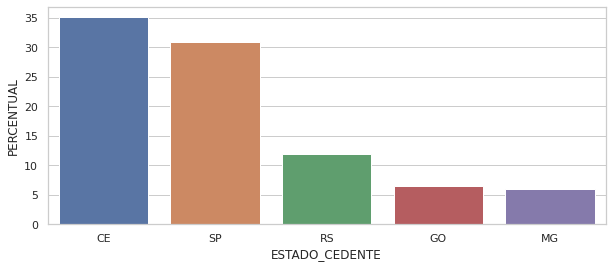

In [ ]:
# Plotar os gráficos para a porcentagem de acordo com Estado do Cedente por qtd contrato
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))
print('Porcentagem Estado do Cedente x Qtd contrato')
sbn.barplot(x='ESTADO_CEDENTE', y='PERCENTUAL', data=df_estado, ax=axis1);

### Análise do percentual da quantidade de contratos por ESTADO_SACADO

In [ ]:
# Analisar a porcentagem de acordo com Estado do Sacado por qtd contrato
print(round((df['ESTADO_SACADO'].value_counts() / df.shape[0] )*100,2));

SP   34.120000
MG   12.080000
RS    8.860000
PR    7.270000
GO    5.310000
SC    4.820000
CE    4.490000
RJ    3.960000
BA    3.500000
PE    1.950000
PA    1.750000
MT    1.670000
DF    1.410000
ES    1.290000
RN    1.220000
MA    1.210000
PB    1.080000
PI    0.720000
MS    0.700000
SE    0.650000
TO    0.550000
AL    0.510000
RO    0.370000
AM    0.340000
AP    0.080000
AC    0.050000
RR    0.010000
Name: ESTADO_SACADO, dtype: float64


In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['SP', 34.06], ['MG', 12.08], ['RS', 8.57], ['PR', 7.27], ['SC', 4.82]] 
  
# Criando o dataframe  
df_estado = pd.DataFrame(data, columns = ['ESTADO_SACADO', 'PERCENTUAL']) 

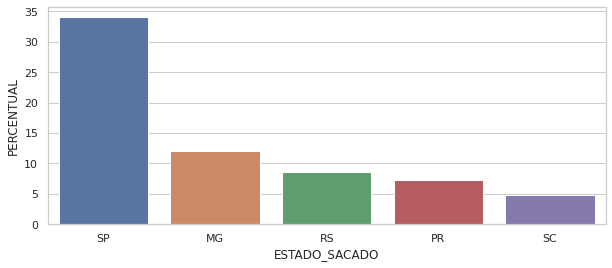

In [ ]:
# Plotar os gráficos para Estado_Sacado vs. Percentual de contratos 
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))

sbn.barplot(x='ESTADO_SACADO', y='PERCENTUAL', data=df_estado, ax=axis1);


In [ ]:
# Taxa Média
print('Taxa Média : ', round((df['TAXA_MENSAL'].mean() * 100),2));

Taxa Média :  4.63


In [ ]:
# Receita Prevista Total
print('Valor Desagio total :', round((df['VALOR_DESAGIO'].sum()),2))

Valor Desagio total : 4572704.21


In [ ]:
# Receita Prevista por Mes

#Convert to pandas date time
df['DATA_PAGAMENTO'] = pd.to_datetime(df['DATA_PAGAMENTO'])

print(df.groupby([df['DATA_PAGAMENTO'].dt.year, df['DATA_PAGAMENTO'].dt.month])['VALOR_DESAGIO'].sum())


DATA_PAGAMENTO  DATA_PAGAMENTO
2017            11                  164.274796
                12                67988.466752
2018            1                639488.603617
                2                422681.095101
                3                486547.925767
                4                469583.925038
                5                358206.475948
                6                696694.146808
                7                389224.209139
                8                436510.630578
                9                567241.103164
                10                 8846.703105
                11                 5404.807484
                12                 3152.110821
2019            1                  1833.701920
                2                  2318.376013
                3                  1332.052717
                4                  1145.929716
                5                  1816.378426
                6                   857.693632
                7            

In [ ]:
# Relação dos 5 primeiros cedentes por valor real
# Percentual do valor real em relação ao total dos 5 primeiros
total_valor_real = df['VALOR_REAL'].sum()
print('Percentual do valor de cada cedente sobre o total')
print(round((df.groupby('CEDENTE')['VALOR_REAL'].sum().sort_values(ascending=False).head(5)) / total_valor_real * 100,2));
print('\n')
print ('Valor total Real :', total_valor_real);


Percentual do valor de cada cedente sobre o total
CEDENTE
Cedente 1    16.960000
Cedente 3    14.880000
Cedente 13    8.800000
Cedente 9     8.230000
Cedente 2     7.660000
Name: VALOR_REAL, dtype: float64


Valor total Real : 60564809.17


In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['Cedente 1', 16.96], ['Cedente 3', 14.88], ['Cedente 13', 8.80], ['Cedente 9', 8.23], ['Cedente 2', 7.66]] 
  
# Criando o dataframe 
df_estado = pd.DataFrame(data, columns = ['CEDENTE', 'PERCENTUAL']) 

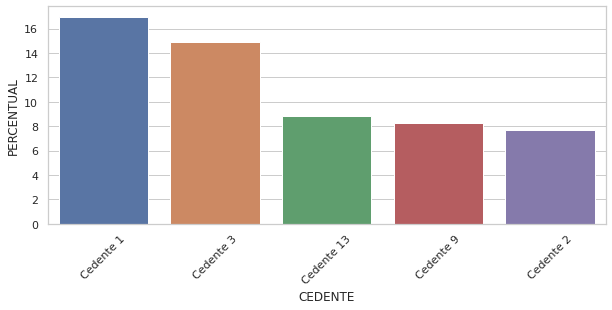

In [ ]:
# Plotar o gráfico para o percentual do valor real em relação ao total dos 5 primeiros 
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))

g = sbn.barplot(x='CEDENTE', y='PERCENTUAL', data=df_estado, ax=axis1)
g.set_xticklabels(g.get_xticklabels(), rotation=45);


In [ ]:
# Relação dos 5 primeiros SACADOS por valor real
# Percentual do valor em relação ao total dos 5 primeiros
total_valor_real = df['VALOR_REAL'].sum()
print('Percentual do valor de cada cedente sobre o total')
print(round((df.groupby('SACADO')['VALOR_REAL'].sum().sort_values(ascending=False).head(5)) / total_valor_real * 100,2));
print('\n')
print ('Valor total Real :', total_valor_real);

Percentual do valor de cada cedente sobre o total
SACADO
Sacado 181   7.070000
Sacado 657   5.680000
Sacado 612   5.280000
Sacado 2     4.950000
Sacado 311   1.730000
Name: VALOR_REAL, dtype: float64


Valor total Real : 60564809.17


In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['Sacado 181', 7.07], ['Sacado 657', 5.68], ['Sacado 612', 5.28], ['Sacado 2', 4.95], ['Sacado 311', 1.73]] 
  
# Criando o DataFrame 
df_grafico = pd.DataFrame(data, columns = ['SACADO', 'PERCENTUAL']) 

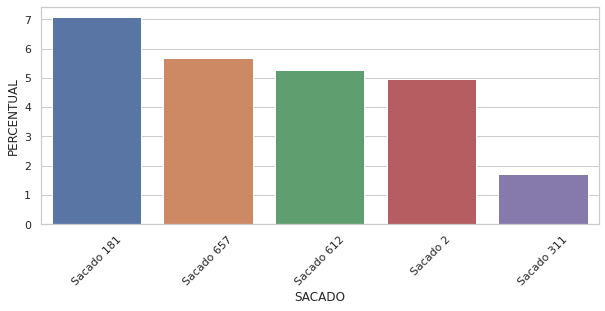

In [ ]:
# Plotar os gráficos para Estado_Sacado vs. Percentual de contratos 
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))

g = sbn.barplot(x='SACADO', y='PERCENTUAL', data=df_grafico, ax=axis1)
g.set_xticklabels(g.get_xticklabels(), rotation=45);


In [ ]:
# Relação dos 5 primeiros ESTADO_CEDENTE por valor real
# Percentual do valor em relação ao total dos 5 primeiros
total_valor_real = df['VALOR_REAL'].sum()
print('Percentual do valor de cada cedente sobre o total')
print(round((df.groupby('ESTADO_CEDENTE')['VALOR_REAL'].sum().sort_values(ascending=False).head(5)) / total_valor_real * 100,2));
print('\n')
print ('Valor total Real :', total_valor_real);

Percentual do valor de cada cedente sobre o total
ESTADO_CEDENTE
SP   35.610000
CE   19.230000
MG   16.770000
RS    7.760000
BA    6.940000
Name: VALOR_REAL, dtype: float64


Valor total Real : 60564809.17


In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['SP', 35.61], ['CE', 19.23], ['MG', 16.77], ['RS', 7.76], ['BA', 6.94]] 
  
# Criando o DataFrame 
df_estado = pd.DataFrame(data, columns = ['ESTADO_CEDENTE', 'PERCENTUAL']) 

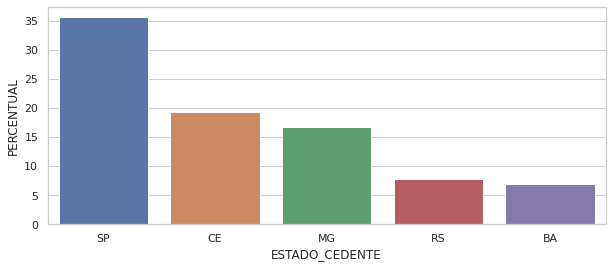

In [ ]:
# Plotar os gráficos para Estado_Cedente vs. Percentual de contratos 
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))

sbn.barplot(x='ESTADO_CEDENTE', y='PERCENTUAL', data=df_estado, ax=axis1);


In [ ]:
# Relação dos 5 primeiros ESTADO_SACADO por valor real
# Percentual do valor em relação ao total 
total_valor_real = df['VALOR_REAL'].sum()
print('Percentual do valor de cada ESTADO_SACADO sobre o total')
print(round((df.groupby('ESTADO_SACADO')['VALOR_REAL'].sum().sort_values(ascending=False).head(5)) / total_valor_real * 100,2));
print('\n')
print ('Valor total Real :', total_valor_real);

Percentual do valor de cada ESTADO_SACADO sobre o total
ESTADO_SACADO
SP   47.460000
MG   14.610000
RS    6.470000
PR    5.780000
RJ    3.840000
Name: VALOR_REAL, dtype: float64


Valor total Real : 60564809.17


In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['SP', 47.46], ['MG', 14.61], ['RS', 6.47], ['PR', 5.78], ['RJ', 3.84]] 
  
# Criando o DataFrame 
df_estado = pd.DataFrame(data, columns = ['ESTADO_SACADO', 'PERCENTUAL']) 

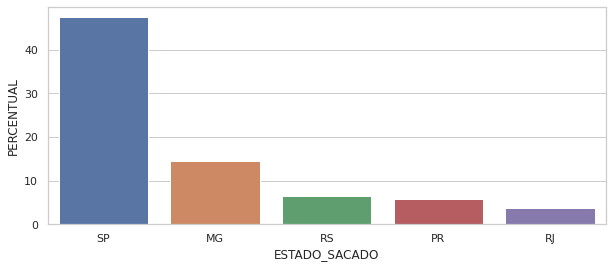

In [ ]:
# Plotar os gráficos para Estado_Sacado vs. Percentual de VALOR_REAL 
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))

sbn.barplot(x='ESTADO_SACADO', y='PERCENTUAL', data=df_estado, ax=axis1);


In [ ]:
# Relação entre Status_Liq_Titulo e Estado do Cedente
print (df.groupby('ESTADO_CEDENTE')['STATUS_LIQ_TITULO'].value_counts())

ESTADO_CEDENTE  STATUS_LIQ_TITULO
BA              EM_DIA                149
                ATRASO                 23
CE              EM_DIA               2753
                ATRASO                552
GO              ATRASO                391
                EM_DIA                218
MG              EM_DIA                446
                ATRASO                121
MT              EM_DIA                 19
                ATRASO                  3
PA              EM_DIA                189
                ATRASO                 25
RJ              EM_DIA                281
                ATRASO                 24
RS              EM_DIA                862
                ATRASO                263
SC              EM_DIA                136
                ATRASO                 46
SE              EM_DIA                  6
                ATRASO                  2
SP              EM_DIA               2487
                ATRASO                417
Name: STATUS_LIQ_TITULO, dtype: int64


In [ ]:
# Qtd total de contratos EM_DIA
total_contratos_em_dia = df_clean[df_clean['STATUS_LIQ_TITULO'] == 'EM_DIA'].count().head(1)
print('Total de contratos em dia', total_contratos_em_dia[0])
 
# PERCENTUAL de contratos EM_DIA por ESTADO_CEDENTE em relação ao TOTAL DE CONTRATOS EM DIA

(df_clean[df_clean['STATUS_LIQ_TITULO'] == 'EM_DIA'].groupby('ESTADO_CEDENTE')['STATUS_LIQ_TITULO'].value_counts() / total_contratos_em_dia[0] * 100).sort_values(ascending=False).head(5)

Total de contratos em dia 7092


ESTADO_CEDENTE  STATUS_LIQ_TITULO
CE              EM_DIA              37.760857
SP              EM_DIA              33.192329
RS              EM_DIA              11.802030
MG              EM_DIA               4.526227
RJ              EM_DIA               3.793006
Name: STATUS_LIQ_TITULO, dtype: float64

In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['CE', 37.76], ['SP', 33.19], ['RS', 11.80], ['MG', 4.52], ['RJ', 3.79]] 
  
# Criando o DataFrame 
df_estado = pd.DataFrame(data, columns = ['ESTADO_CEDENTE', 'PERCENTUAL']) 

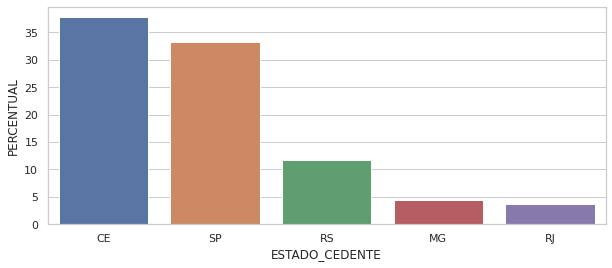

In [ ]:
# Plotar o gráfico para PERCENTUAL de contratos EM_DIA por ESTADO_CEDENTE em relação ao TOTAL DE CONTRATOS EM DIA
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))

sbn.barplot(x='ESTADO_CEDENTE', y='PERCENTUAL', data=df_estado, ax=axis1);


In [ ]:
# Qtd total de contratos EM_DIA
total_contratos_em_dia = df_clean[df_clean['STATUS_LIQ_TITULO'] == 'EM_DIA'].count().head(1)
print('Total de contratos EM DIA',total_contratos_em_dia[0])
 
# PERCENTUAL de contratos EM_DIA por ESTADO_SACADO em relação ao TOTAL DE CONTRATOS EM DIA

(df_clean[df_clean['STATUS_LIQ_TITULO'] == 'EM_DIA'].groupby('ESTADO_SACADO')['STATUS_LIQ_TITULO'].value_counts() / total_contratos_em_dia[0] * 100).sort_values(ascending=False).head(5)


Total de contratos EM DIA 7092


ESTADO_SACADO  STATUS_LIQ_TITULO
SP             EM_DIA              34.940778
MG             EM_DIA              10.829103
RS             EM_DIA               8.671743
PR             EM_DIA               7.628314
SC             EM_DIA               5.569656
Name: STATUS_LIQ_TITULO, dtype: float64

In [ ]:
# Grafico de Pizza para os 5 primeiros
data = [['SP', 34.94], ['MG', 10.82], ['RS', 8.67], ['PR', 7.62], ['SC', 5.56]] 
  
# Criando o DataFrame 
df_estado = pd.DataFrame(data, columns = ['ESTADO_SACADO', 'PERCENTUAL']) 

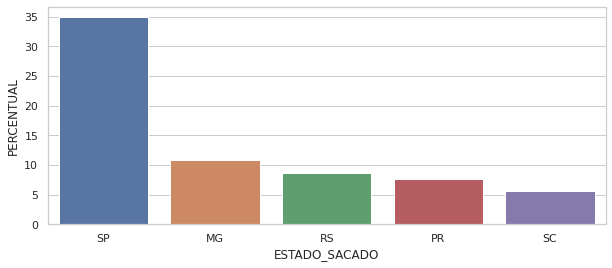

In [ ]:
# Plotar os gráficos para PERCENTUAL de contratos EM_DIA por ESTADO_SACADO em relação ao TOTAL DE CONTRATOS EM DIA
fig, (axis1) = plt.subplots(1,1, figsize=(10,4))

sbn.barplot(x='ESTADO_SACADO', y='PERCENTUAL', data=df_estado, ax=axis1);
